# Analysising how the ACA changed Insurance for the Uninsured

### In my project I am wanting to take a look at how the Affordable Care Act changed insurance for the uninsured in the United States. The questions that I want to answer are: What are the top 5 states with the highest uninsured rate drop? What state had the biggest change in insurance coverage from 2010 to 2015? What state had the highest average monthly tax credit in 2016?

CODE imports the necessary libraries

In [123]:
import os
import sqlite3
import csv

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

CODE to create database and table within the database.

In [124]:
conn = sqlite3.connect('aca_data.db')

aca_data = pd.read_csv('states_new.csv')

aca_data.to_sql('aca_data', conn, if_exists ='replace')

CODE to retrieve data from SQL database into a python object.

In [125]:
df = pd.read_sql_query("""SELECT * FROM aca_data""", conn)

## Original Database

In [126]:
df

,index,State,Uninsured_Rate_2010,Uninsured_Rate_2015,Uninsured_Rate_Change_2010_2015,Health_Insurance_Coverage_Change_2010_2015,Employer_Health_Insurance_Coverage_2015,Marketplace_Health_Insurance_Coverage_2016,Marketplace_Tax_Credits_2016,Average_Monthly_Tax_Credit_2016,State_Medicaid_Expansion_2016,Medicaid_Enrollment_2013,Medicaid_Enrollment_2016,Medicaid_Enrollment_Change_2013_2016,Medicare_Enrollment_2016
0,0,Alabama,14.6,10.1,-4.5,215000,2545000,165534,152206,310,0,799176.0,910775,111599.0,989855
1,1,Alaska,19.9,14.9,-5.0,36000,390000,17995,16205,750,1,122334.0,166625,44291.0,88966
2,2,Arizona,16.9,10.8,-6.1,410000,3288000,179445,124346,230,1,1201770.0,1716198,514428.0,1175624
3,3,Arkansas,17.5,9.5,-8.0,234000,1365000,63357,56843,306,1,556851.0,920194,363343.0,606146
4,4,California,18.5,8.6,-9.9,3826000,19552000,1415428,1239893,309,1,7755381.0,11843081,4087700.0,5829777
5,5,Colorado,15.9,8.1,-7.8,419000,2949000,108311,67062,318,1,783420.0,1375264,591844.0,820234
6,6,Connecticut,9.1,6.0,-3.1,110000,2148000,102917,80759,357,1,NaN,761137,NaN,644136
7,7,Delaware,9.7,5.9,-3.8,35000,564000,25379,21467,330,1,223324.0,236702,13378.0,186835
8,8,District of Columbia,7.6,3.8,-3.8,25000,388000,17666,1224,183,1,235786.0,255491,19705.0,90492
9,9,Florida,21.3,13.3,-8.0,1597000,8847000,1531714,1428712,305,0,3104996.0,3644673,539677.0,4149593


CODE to rename columns in SQL database. 

In [127]:
df.rename(
    columns={
        'State':'State',
        'Uninsured_Rate_2010': 'Uninsured 2010',
        'Uninsured_Rate_2015': 'Uninsured 2015',
        'Uninsured_Rate_Change_2010_2015': 'Uninsured Rate Change 2010 to 2015', 
        'Health_Insurance_Coverage_Change_2010_2015': 'Insurance Coverage Change 2010 to 2015', 
        'Employer_Health_Insurance_Coverage_2015': 'Employer coverage 2015', 
        'Marketplace_Health_Insurance_Coverage_2016': 'Marketplace Coverage 2016', 
        'Marketplace_Tax_Credits_2016': 'Marketplace Tax Credits 2016',
        'Average_Monthly_Tax_Credit_2016': 'Average Monthly Tax Credit 2016',
        'State_Medicaid_Expansion_2016': 'State Medicaid Expansion 2016',
        'Medicaid_Enrollment_2013': 'Medicaid Enrollment 2013',
        'Medicaid_Enrollment_2016': 'Medicaid Enrollment 2016',
        'Medicaid_Enrollment_Change_2013_2016':'Medicaid Enrollment Change 2013 to 2016',
        'Medicare_Enrollment_2016': 'Medicare Enrollment 2016'
        
        
    }, 
    inplace=True)

# Transformed Database

In [128]:
df

,index,State,Uninsured 2010,Uninsured 2015,Uninsured Rate Change 2010 to 2015,Insurance Coverage Change 2010 to 2015,Employer coverage 2015,Marketplace Coverage 2016,Marketplace Tax Credits 2016,Average Monthly Tax Credit 2016,State Medicaid Expansion 2016,Medicaid Enrollment 2013,Medicaid Enrollment 2016,Medicaid Enrollment Change 2013 to 2016,Medicare Enrollment 2016
0,0,Alabama,14.6,10.1,-4.5,215000,2545000,165534,152206,310,0,799176.0,910775,111599.0,989855
1,1,Alaska,19.9,14.9,-5.0,36000,390000,17995,16205,750,1,122334.0,166625,44291.0,88966
2,2,Arizona,16.9,10.8,-6.1,410000,3288000,179445,124346,230,1,1201770.0,1716198,514428.0,1175624
3,3,Arkansas,17.5,9.5,-8.0,234000,1365000,63357,56843,306,1,556851.0,920194,363343.0,606146
4,4,California,18.5,8.6,-9.9,3826000,19552000,1415428,1239893,309,1,7755381.0,11843081,4087700.0,5829777
5,5,Colorado,15.9,8.1,-7.8,419000,2949000,108311,67062,318,1,783420.0,1375264,591844.0,820234
6,6,Connecticut,9.1,6.0,-3.1,110000,2148000,102917,80759,357,1,NaN,761137,NaN,644136
7,7,Delaware,9.7,5.9,-3.8,35000,564000,25379,21467,330,1,223324.0,236702,13378.0,186835
8,8,District of Columbia,7.6,3.8,-3.8,25000,388000,17666,1224,183,1,235786.0,255491,19705.0,90492
9,9,Florida,21.3,13.3,-8.0,1597000,8847000,1531714,1428712,305,0,3104996.0,3644673,539677.0,4149593


# The Affordable Care Act Data Collection

###The states.csv and states_new.csv is a data collection from all 50 states in the US from when the Affordable Care Act started under President Obama. The main data that I used was from 2010 to 2015. This data collection shows how each state faired under the new Affordable Care Act that was inplemented. The things that I looked at in the data collections was the drop in the uninsured rate by state, the insurance coverage change from 2010 to 2015, and the average monthly tax credit that each state received. 

I received my dataset from https://www.kaggle.com/hhs/health-insurance

### 1. What are the top 5 states with the highest uninsured rate drop?

In [129]:
df.sort_values(by="Uninsured Rate Change 2010 to 2015", ascending=True)

,index,State,Uninsured 2010,Uninsured 2015,Uninsured Rate Change 2010 to 2015,Insurance Coverage Change 2010 to 2015,Employer coverage 2015,Marketplace Coverage 2016,Marketplace Tax Credits 2016,Average Monthly Tax Credit 2016,State Medicaid Expansion 2016,Medicaid Enrollment 2013,Medicaid Enrollment 2016,Medicaid Enrollment Change 2013 to 2016,Medicare Enrollment 2016
28,28,Nevada,22.6,12.3,-10.3,294000,1505000,79876,71472,268,1,332560.0,614298,281738.0,471747
37,37,Oregon,17.1,7.0,-10.1,403000,2070000,131167,95507,253,1,626356.0,1021862,395506.0,784032
4,4,California,18.5,8.6,-9.9,3826000,19552000,1415428,1239893,309,1,7755381.0,11843081,4087700.0,5829777
17,17,Kentucky,15.3,6.0,-9.3,404000,2316000,74640,56488,258,1,606805.0,1220788,613983.0,881938
31,31,New Mexico,19.6,10.9,-8.7,178000,884000,47497,32703,212,1,457678.0,766732,309054.0,385918
48,48,West Virginia,14.6,6.0,-8.6,156000,976000,33235,29163,388,1,354544.0,575645,221101.0,423500
3,3,Arkansas,17.5,9.5,-8.0,234000,1365000,63357,56843,306,1,556851.0,920194,363343.0,606146
9,9,Florida,21.3,13.3,-8.0,1597000,8847000,1531714,1428712,305,0,3104996.0,3644673,539677.0,4149593
5,5,Colorado,15.9,8.1,-7.8,419000,2949000,108311,67062,318,1,783420.0,1375264,591844.0,820234
47,47,Washington,14.2,6.6,-7.6,537000,3986000,158245,110476,238,1,1117576.0,1788536,670960.0,1238649


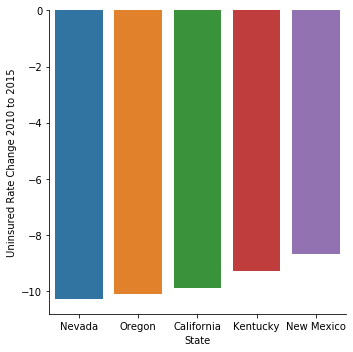

In [146]:
sns.catplot(
    x="State",
    y="Uninsured Rate Change 2010 to 2015",
    data=df,
    kind="bar",
    height=5,
    aspect=1,
    order= ('Nevada', 'Oregon', 'California', 'Kentucky', 'New Mexico'),
)

### What state had the biggest change in insurance coverage from 2010 to 2015?

In [132]:
database = pd.read_sql_query("""
    SELECT 
        State,
        Health_Insurance_Coverage_Change_2010_2015
        FROM aca_data
""", conn)

In [133]:
database

,State,Health_Insurance_Coverage_Change_2010_2015
0,Alabama,215000
1,Alaska,36000
2,Arizona,410000
3,Arkansas,234000
4,California,3826000
5,Colorado,419000
6,Connecticut,110000
7,Delaware,35000
8,District of Columbia,25000
9,Florida,1597000


In [134]:
database.sort_values(by="Health_Insurance_Coverage_Change_2010_2015", ascending=False)

,State,Health_Insurance_Coverage_Change_2010_2015
4,California,3826000
43,Texas,1781000
9,Florida,1597000
32,New York,939000
13,Illinois,850000
35,Ohio,664000
22,Michigan,618000
10,Georgia,581000
33,North Carolina,552000
47,Washington,537000


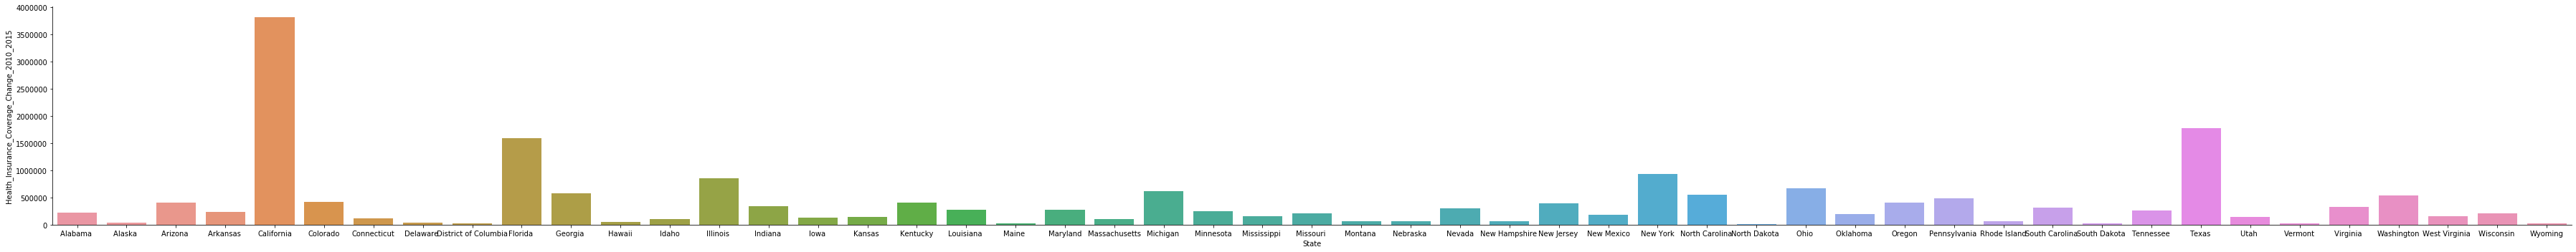

In [145]:
sns.catplot(
    x="State",
    y="Health_Insurance_Coverage_Change_2010_2015",
    data=database,
    kind="bar",
    height=5,
    aspect=10,
)

### What state had the highest average monthly tax credit in 2016?

In [138]:
tax = pd.read_sql_query("""
    SELECT 
        State,
        Average_Monthly_Tax_Credit_2016
    FROM aca_data
""", conn)

In [139]:
tax

,State,Average_Monthly_Tax_Credit_2016
0,Alabama,310
1,Alaska,750
2,Arizona,230
3,Arkansas,306
4,California,309
5,Colorado,318
6,Connecticut,357
7,Delaware,330
8,District of Columbia,183
9,Florida,305


In [140]:
tax.sort_values(by="Average_Monthly_Tax_Credit_2016", ascending=False)

,State,Average_Monthly_Tax_Credit_2016
1,Alaska,750
50,Wyoming,459
33,North Carolina,401
48,West Virginia,388
18,Louisiana,362
6,Connecticut,357
19,Maine,342
49,Wisconsin,332
7,Delaware,330
30,New Jersey,322


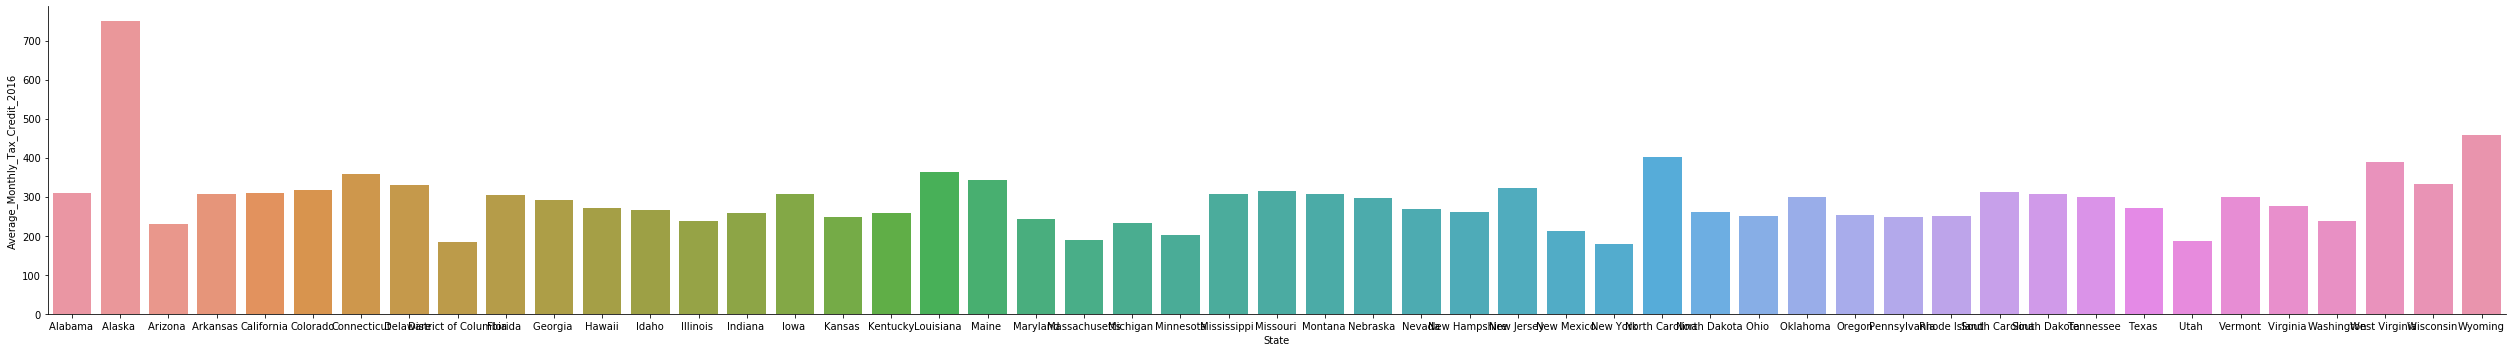

In [144]:
sns.catplot(
    x="State",
    y="Average_Monthly_Tax_Credit_2016",
    data=tax,
    kind="bar",
    height=5,
    aspect=7,
)

# Conclusion

### The affordable care act has been in affect for almost an entire decade now. The dataset that I found only had data for a 5 year period, but from that data I was able to find out what states benefitted the most in 3 categories. Nevada was the state that had the biggest drop in uninsured rate from 22.6% to 12.3%, which is a -10.3% drop. My first seaborn visualization represents this drop. The next state to benefit greatly from the Affordable Care Act was California. California had an insurance coverage change of 3,826,000. That means that in a 5 year span with the new ACA law in place that 3,826,000 people were able to gain some sort of healthcare coverage. My second visualization represents this data. The third and final category was the average monthly tax credit that states received due to the affordable care act. Alaska was the state that benefitted the most with an average monthly tax credit of 750 dollars. I believe that every state won when the ACA was enacted, but these 3 states got the best deal in their individual categories. 